<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/Time_Series_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
data = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,23735.423828,24316.916016,23649.960938,24165.556641,24165.556641,33508045052
2021-01-02,24167.451172,27321.906250,23972.966797,26474.892578,26474.892578,55925382232
2021-01-03,26476.656250,28519.630859,26413.128906,26760.720703,26760.720703,64216240796
2021-01-04,26784.332031,27294.240234,23363.980469,26094.005859,26094.005859,66241895056
2021-01-05,26098.189453,28009.367188,24633.167969,27639.482422,27639.482422,54923202611


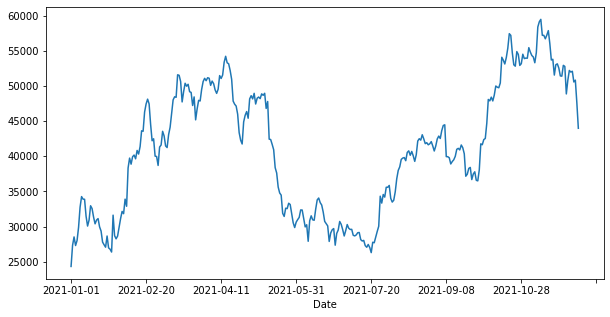

In [8]:
data['High'].plot(figsize=(10, 5))
plt.show()

In [11]:
data.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05'],
              dtype='datetime64[ns]', name='Date', length=339, freq=None)

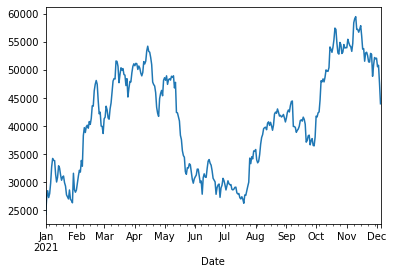

In [12]:
data['2021']['High'].plot()

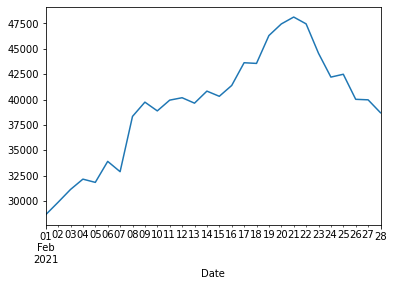

In [14]:
data['2021-02']['High'].plot()

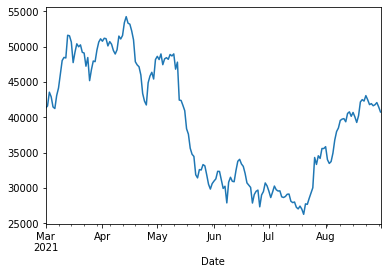

In [13]:
data['2021-03':'2021-08']['High'].plot() #slicing

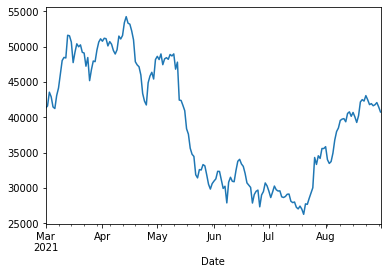

In [15]:
data.loc['2021-03':'2021-08', 'High'].plot() #slicing

In [16]:
pd.to_datetime('2021/02/16')

Timestamp('2021-02-16 00:00:00')

In [24]:
pd.to_datetime(np.datetime64("2021-02-16 14:18"))

Timestamp('2021-02-16 14:18:00')

## **Resample Function**

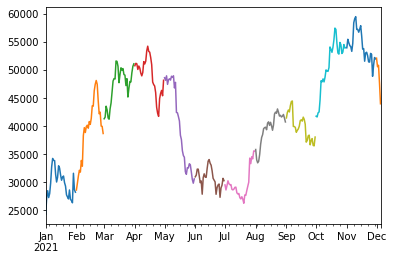

In [25]:
data.loc['2021', 'High'].resample('M').plot()
plt.show()

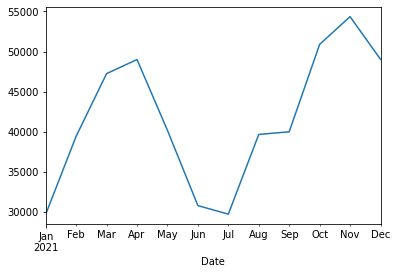

In [27]:
data.loc['2021', 'High'].resample('M').mean().plot()
plt.show()

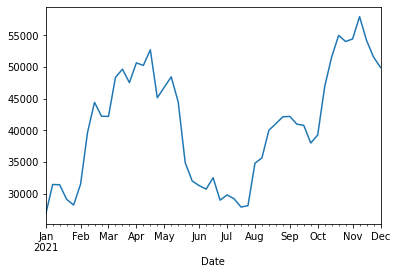

In [28]:
data.loc['2021', 'High'].resample('W').mean().plot()
plt.show()

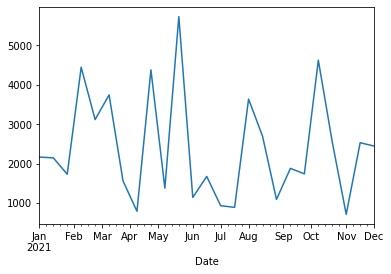

In [29]:
data.loc['2021', 'High'].resample('2W').std().plot()
plt.show()

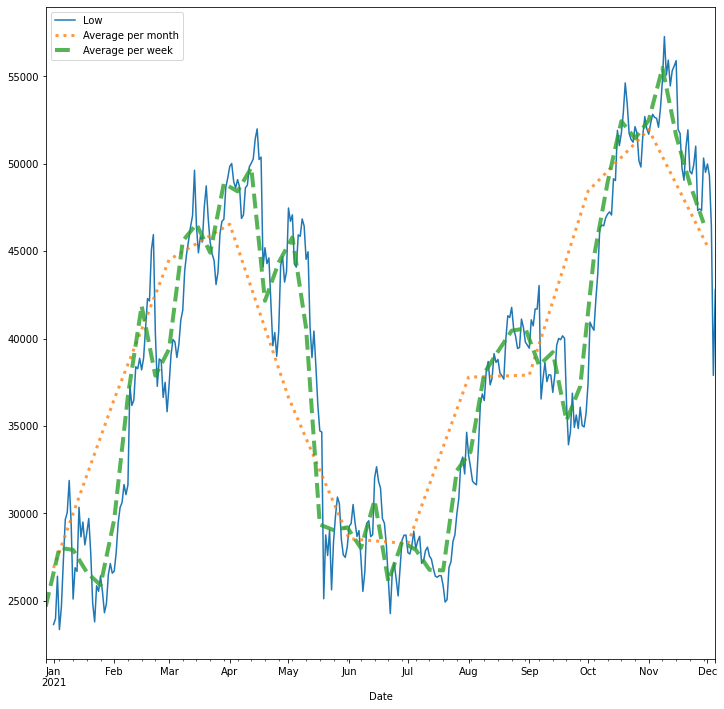

In [31]:
plt.figure(figsize=(12,12))
data.loc['2021', 'Low'].plot()
data.loc['2021', 'Low'].resample('M').mean().plot(label='Average per month', lw=3, ls=':', alpha=0.8)
data.loc['2021', 'Low'].resample('W').mean().plot(label='Average per week', lw=4, ls='--', alpha=0.8)
plt.legend()
plt.show()


In [34]:
Tab_data = data.loc['2021', 'Low'].resample('W').agg(['mean', 'std', 'min', 'max'])

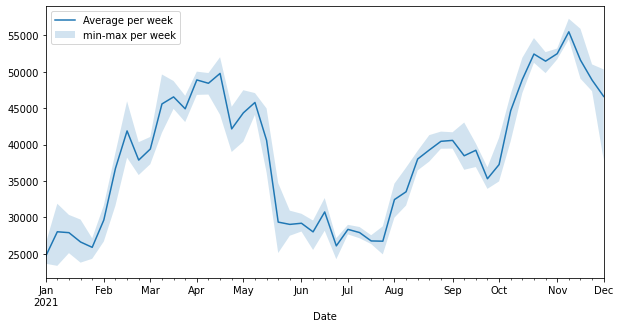

In [36]:
plt.figure(figsize=(10,5))

Tab_data['mean']['2021'].plot(label='Average per week')
plt.fill_between(Tab_data.index, Tab_data['min'], Tab_data['max'], alpha=0.2, label='min-max per week')

plt.legend()
plt.show()

#**Moving Average :**
Provide rolling window calculations.

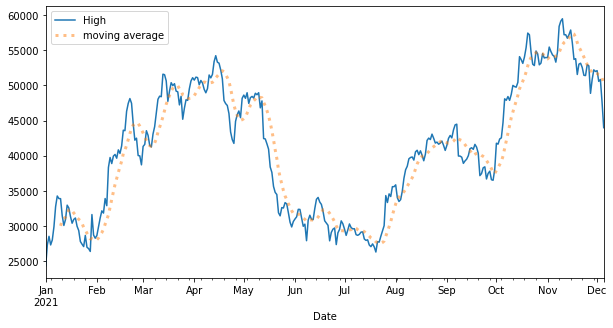

In [42]:
plt.figure(figsize=(10,5))

data.loc['2021', 'High'].plot(label='High')
data.loc['2021', 'High'].rolling(window=10).mean().plot(label='moving average', lw=3, ls=':', alpha=0.5)

plt.legend()
plt.show()

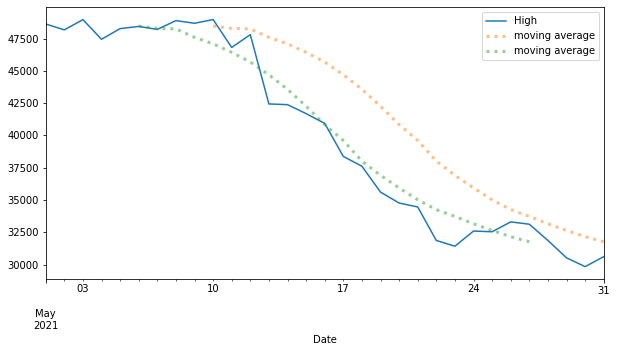

In [43]:
plt.figure(figsize=(10,5))

data.loc['2021-05', 'High'].plot(label='High')
data.loc['2021-05', 'High'].rolling(window=10).mean().plot(label='moving average', lw=3, ls=':', alpha=0.5)
data.loc['2021-05', 'High'].rolling(window=10, center=True).mean().plot(label='moving average', lw=3, ls=':', alpha=0.5)

plt.legend()
plt.show()

# **Exp Weighted Function**
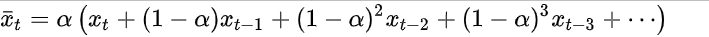

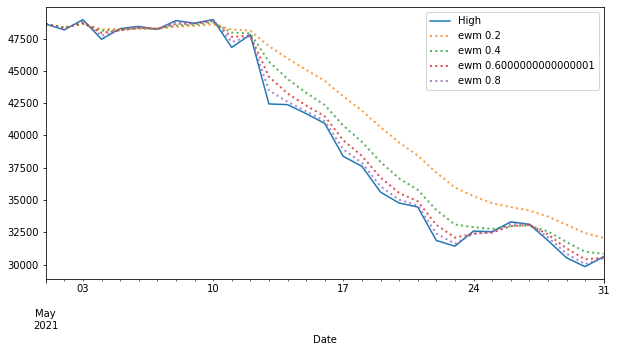

In [47]:
plt.figure(figsize=(10,5))

data.loc['2021-05', 'High'].plot(label='High')
for i in np.arange(0.2 , 1, 0.2):
    data.loc['2021-05', 'High'].ewm(alpha=i).mean().plot(label=f'ewm {i}', lw=2, ls=':', alpha=0.8)
plt.legend()
plt.show()  

# **Merging Data sets**

In [49]:
data2= pd.read_csv('ETH-EUR5.csv', index_col='Date', parse_dates=True)

In [50]:
data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,187.862411,196.486679,188.634079,191.664566,191.664566,8.336536e+09
2019-09-19,191.532379,201.739441,185.277878,200.299454,200.299454,9.613097e+09
2019-09-20,200.108246,201.092926,195.249847,197.872787,197.872787,7.285106e+09
2019-09-21,197.734238,200.511932,195.105133,195.573410,195.573410,7.026783e+09
2019-09-22,195.546509,196.099777,188.439224,191.978912,191.978912,7.090220e+09


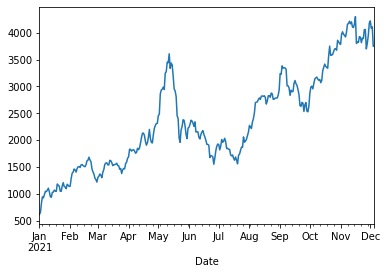

In [52]:
data2['2021']['High'].plot()

In [56]:
btc_eth=pd.merge(data, data2, on='Date', how='inner', suffixes=('_BTC', '_ETH'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ae2d84d0>,
      dtype=object)

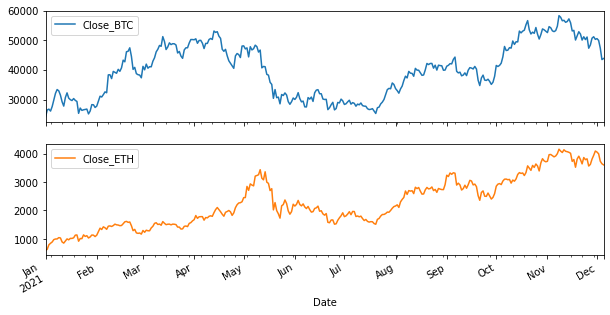

In [59]:
btc_eth[['Close_BTC','Close_ETH']].plot(subplots=True, figsize=(10,5))

In [62]:
correlation=btc_eth[['Close_BTC','Close_ETH']].corr()

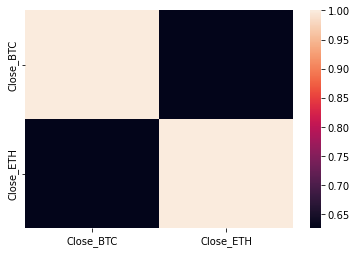

In [63]:
import seaborn as sns
sns.heatmap(correlation)